In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

图片尺寸20列×30行像素，展开为一行作为一个样本。
网络结构：输入600，隐藏600，输出10，对应数字0-9

In [2]:
# 训练样本
train_sample = []
image_files = [os.path.join("", f) for f in os.listdir("./train sample/")]
for filename in image_files:
    image = cv2.imread("./train sample/" + filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    binary_image = binary_image / 255
    train_sample.append(binary_image.flatten())
train_sample = tf.Variable(np.array(train_sample, dtype=np.float32))

# 训练标签
hot_matrix = np.identity(10, dtype=np.float32)
train_lable = []
for filename in image_files:
    train_lable.append(hot_matrix[int(filename[0])])
train_lable = tf.Variable(np.array(train_lable, dtype=np.float32))

# 测试样本
test_sample = []
image_files = [os.path.join("", f) for f in os.listdir("./test sample/")]
for filename in image_files:
    image = cv2.imread("./test sample/" + filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    binary_image = binary_image / 255
    test_sample.append(binary_image.flatten())
test_sample = tf.Variable(np.array(test_sample, dtype=np.float32))

# 测试标签
test_lable = []
for filename in image_files:
    test_lable.append(hot_matrix[int(filename[0])])
test_lable = tf.Variable(np.array(test_lable, dtype=np.float32))

In [3]:
W = tf.Variable(np.random.uniform(low=-1, high=1, size=(600, 600)), dtype=np.float32)
V = tf.Variable(np.random.uniform(low=-1, high=1, size=(600, 10)), dtype=np.float32)

b1 = tf.Variable(np.ones([600], dtype=np.float32) * 0.1)
b2 = tf.Variable(np.ones([10], dtype=np.float32) * 0.1)

learning_rate=0.01
train_loss_history=[]
test_loss_history=[]

test_loss:2.779451608657837
train_loss:0.3701212704181671


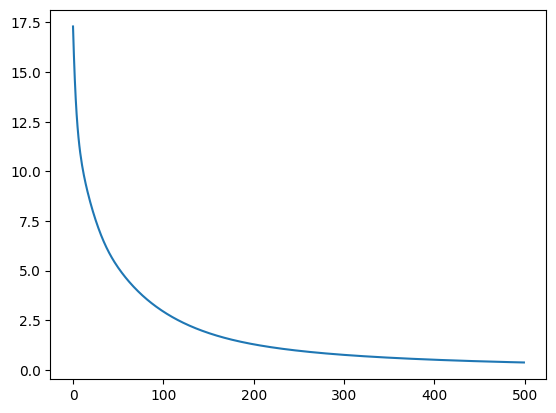

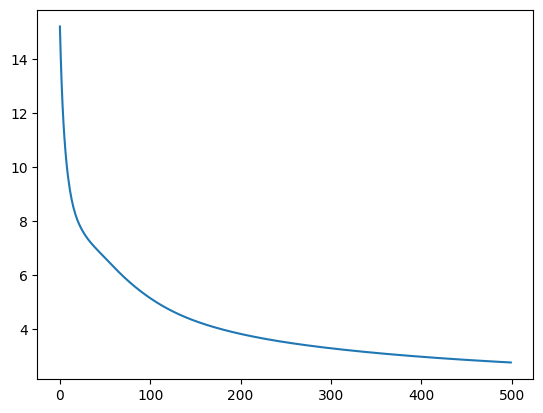

In [4]:
for ep in range(500):
#while True:
    with tf.GradientTape() as tape:
        tape.watch([W, b1, V, b2])
        train_h = tf.nn.sigmoid(tf.matmul(train_sample, W) + b1)
        train_y = tf.matmul(train_h, V) + b2

        # 计算损失（交叉熵）
        train_loss = tf.nn.softmax_cross_entropy_with_logits(labels=train_lable, logits=train_y)
        train_loss = tf.reduce_mean(train_loss)
        train_loss_history.append(train_loss)
        if train_loss < 0.01:
            break
    gradients = tape.gradient(train_loss, [W, b1, V, b2])
    # print(f"ep{ep}:Output:{y}")
    # print(f"ep{ep}:mean loss:{loss}")
    # print(f"ep{ep}:gradients:{gradients}")

    W.assign_sub(learning_rate * gradients[0])
    b1.assign_sub(learning_rate * gradients[1])
    V.assign_sub(learning_rate * gradients[2])
    b2.assign_sub(learning_rate * gradients[3])


    test_h = tf.nn.sigmoid(tf.matmul(test_sample, W) + b1)
    test_y = tf.matmul(test_h, V) + b2
    test_loss = tf.nn.softmax_cross_entropy_with_logits(labels=test_lable, logits=test_y)
    test_loss = tf.reduce_mean(test_loss)
    test_loss_history.append(test_loss)
plt.figure()
plt.plot(train_loss_history)
plt.figure()
plt.plot(test_loss_history)
print(f"test_loss:{test_loss}")
print(f"train_loss:{train_loss}")

In [5]:
# np.save("W.npy",W)
# np.save("V.npy",V)
# np.save("b1.npy",b1)
# np.save("b2.npy",b2)